## Analyzing warbler data from Alcaide et al 2014

We want to be able to recapitulate the ring-like migration surface of the greenish warbler species in Asia, but also detect long-range migration events from the SpaceMix paper. 

In [3]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import os
import numpy as np
from datetime import date
import pkg_resources
from sklearn.impute import SimpleImputer
from pandas_plink import read_plink
from copy import deepcopy
import itertools as it
import statsmodels.api as sm
from scipy.stats.distributions import chi2
from random import choices
import scipy as sp

# viz
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import seaborn as sns
import plotly.express as px

# feems
import sys
sys.path.append('../../')
from feems.utils import prepare_graph_inputs
from feems.spatial_graph import query_node_attributes
from feems import SpatialGraph, Viz, Objective
from feems.cross_validation import run_cv, comp_mats, run_cv_joint
from feems.helper_funcs import cov_to_dist, comp_genetic_vs_fitted_distance, plot_default_vs_long_range, get_best_lre
from feems.joint_ver import Joint_SpatialGraph, Joint_Objective

# change matplotlib fonts
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.sans-serif"] = "Arial"

In [113]:
os.chdir("/Users/vivaswatshastry/Google Drive/Other computers/My Mac mini/Documents/feemsResults/warblers/data")
coord = np.loadtxt("warblr.coord")  # sample coordinates
outer = np.loadtxt("warblr.outer")  # outer coordinates
grid_path = "/Users/vivaswatshastry/src/feems/feems/data/grid_100.shp"  # path to discrete global grid

# # graph input files
outer, edges, grid, _ = prepare_graph_inputs(coord=coord, 
                                             ggrid=grid_path,
                                             translated=False, 
                                             buffer=3,
                                             outer=None)

genotypes = np.loadtxt('genotypes_ESM13.csv',skiprows=0,delimiter=' ')

In [89]:
# os.chdir("/Users/vivaswatshastry/Google Drive/Other computers/My Mac mini/Documents/feemsResults/59-Ursus_Example")
# coord = np.loadtxt("59-Ursus_FILT.coords.txt",usecols=(1,2))  # sample coordinates
# outer = np.loadtxt("california_grid.txt")  # outer coordinates
# grid_path = "world_triangle_res8.shp"  # path to discrete global grid

# (bim, fam, G) = read_plink("59-Ursus_pruned_0.6")
# imp = SimpleImputer(missing_values=np.nan, strategy="mean")
# genotypes = imp.fit_transform((np.array(G)).T)

# print("n_samples={}, n_snps={}".format(genotypes.shape[0], genotypes.shape[1]))

# # graph input files
# outer, edges, grid, _ = prepare_graph_inputs(coord=coord, 
#                                              ggrid=grid_path,
#                                              translated=True, 
#                                              buffer=3,
#                                              outer=None)

genotypes = genotypes[:,np.random.choice(genotypes.shape[1],size=200000,replace=False)]
genotypes = np.delete(genotypes,np.where(genotypes.sum(axis=0)==0)[0],1)
genotypes = np.delete(genotypes,np.where(genotypes.sum(axis=0)==2*genotypes.shape[0])[0],1)

In [177]:
# warblr_graph = Joint_SpatialGraph(genotypes, coord, grid, edges)
# warblr_graph.fit(lamb=.1,optimize_q='n-dim')

obj = Joint_Objective(warblr_graph); obj.inv(); obj.grad(reg=False)
fit_cov, _, emp_cov = comp_mats(obj)
fit_dist = cov_to_dist(fit_cov)[np.tril_indices(warblr_graph.n_observed_nodes, k=-1)]
emp_dist = cov_to_dist(emp_cov)[np.tril_indices(warblr_graph.n_observed_nodes, k=-1)]
# X = sm.add_constant(fit_dist)
# mod = sm.OLS(emp_dist, X)
# res = mod.fit()
# muhat, betahat = res.params
# plt.plot(fit_dist, emp_dist, 'o', color='grey', alpha=0.5, markersize=4); plt.plot(fit_dist, betahat*fit_dist+muhat, color='orange', ls='--', lw=1)
# plt.text(1, 0.3, r'$R^2 \approx {}$'.format(np.around(res.rsquared_adj,2)), fontsize=15); plt.title(r'$c=0.25$'); plt.xlabel('fit distance'); plt.ylabel('empirical distance'); plt.grid();

# het_white(res.resid, X)

# plt.hist(emp_dist/fit_dist-np.mean(emp_dist/fit_dist),bins=15); plt.axvline(-3*np.std(emp_dist/fit_dist),color='red')
# plt.plot(fit_dist,emp_dist/fit_dist-np.mean(emp_dist/fit_dist),'ko'); plt.axhline(-1.5*np.std(emp_dist/fit_dist),color='red')
# for k in np.where(emp_dist/fit_dist-np.mean(emp_dist/fit_dist)< -1.5 * np.std(emp_dist/fit_dist))[0]:
#     x = np.floor(np.sqrt(2*k+0.25)-0.5).astype('int')+1; y = int(k - 0.5*x*(x-1)); print(x, y)

# Loo = np.linalg.pinv(warblr_graph.L.todense())[:warblr_graph.n_observed_nodes,:warblr_graph.n_observed_nodes]

# idx = np.random.choice(genotypes.shape[1],size=1500,replace=False)
# bootgenotypes = genotypes[:,idx]
# bootgenotypes = np.delete(bootgenotypes,np.where(bootgenotypes.sum(axis=0)==0)[0],1)
# bootgenotypes = np.delete(bootgenotypes,np.where(bootgenotypes.sum(axis=0)==2*bootgenotypes.shape[0])[0],1)
# warblr_graph = Joint_SpatialGraph(genotypes, coord, grid, edges)
# warblr_graph.fit(lamb=.5,optimize_q='n-dim',lamb_q=1.,alpha_q=0.1)

0.009981558822439398

/Users/vivaswatshastry/src/feems/docs/notebooks/../../feems/viz.py:146: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  self.idx = nx.adjacency_matrix(self.sp_graph).nonzero()
/Users/vivaswatshastry/src/feems/docs/notebooks/../../feems/viz.py:335: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  w = np.append(w, W[idx[i][0], idx[i][1]])
/Users/vivaswatshastry/mambaforge/envs/feems/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(


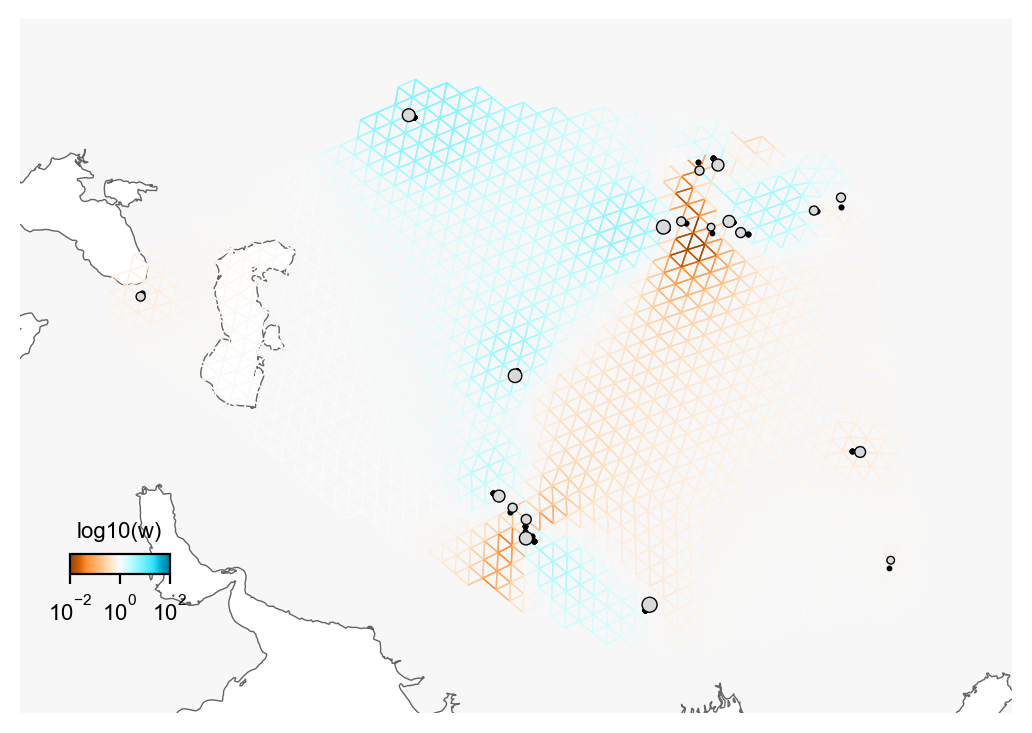

In [138]:
# projection = ccrs.EquidistantConic(central_longitude=85.5, central_latitude=42.54)   
fig = plt.figure(dpi=200)
ax = fig.add_subplot(1, 1, 1, projection=projection)  
v = Viz(ax, warblr_graph, projection=projection, edge_width=.5, 
        edge_alpha=1, edge_zorder=100, sample_pt_size=10, 
        obs_node_size=7.5, sample_pt_color="black", cbar_ticklabelsize=8, cbar_width=0.5, cbar_height=0.1,
        cbar_font_size=8)
v.draw_map(); v.draw_samples(); v.draw_edges(use_weights=True); v.draw_obs_nodes(use_ids=False); v.draw_edge_colorbar()

In [140]:
# lle, te = get_best_lre(warblr_graph, lamb_cv=0.1, k=5, top=10, nchoose=100, option='hard')

warblr_graph.fit(lamb=1.,optimize_q='n-dim',lamb_q=1.,alpha_q=0.5)
# warblr_graph.fit(lamb=10.5,optimize_q='n-dim',lamb_q=1.,alpha_q=0.5,option='onlyc',long_range_edges=[(2,15),(13,16),(7,18),(0,10)])
# warblr_graph.c 
# obj = Joint_Objective(warblr_graph); obj.inv(); obj.grad(reg=False)
# obj.Linv.shape

constant-w/variance fit, converged in 145 iterations, train_loss=45007.608
lambda=1.000, alpha=1.9394, converged in 19 iterations, train_loss=35139.194


In [2]:
# obj.Linv.shape
# af = genotypes.sum(axis=0)/(2*95)
# plt.hist(af,bins=20); plt.xlabel('allele frequency'); 
# plt.plot(2*af*(1-af),'ko',alpha=0.4); plt.grid()

# TU: 34, 35 & AB: 8, 9 (~60% of sites are invariant between the two)
# p1 = genotypes[34:36,:].sum(axis=0)/(2*2)
# p2 = genotypes[76:78,:].sum(axis=0)/(2*2)

# fst = (p1*(1-p2-1+p1) + p2*(1-p1-1+p2))/(p1*(1-p2)+p2*(1-p1))
## fst[np.isnan(fst)] = 0
# plt.plot(fst[~np.isnan(fst)],'k-o',alpha=0.3); plt.grid(); plt.ylabel(r'$F_{ST}$'); plt.xlabel('SNP index')

NameError: name 'warblr_graphc' is not defined

In [159]:
permuted_idx = query_node_attributes(warblr_graph, "permuted_idx")
obs_perm_ids = permuted_idx[: warblr_graph.n_observed_nodes]
node_to_pop = pd.DataFrame(index = np.arange(warblr_graph.n_observed_nodes), columns = ['nodes', 'pops'])
node_to_pop['nodes'] = obs_perm_ids

max_res_nodes = [(1,9)] #[(1,9),(2,15),(16,13),(0,10)] #[(10,1),(2,15),(0,13),(7,18)]
# [(255, 1060), (484, 1195), (1224, 1146), (12, 1092)] #[(1092, 255), (484, 1195), (12, 1146), (1264, 700)]
list(map(tuple,node_to_pop['nodes'][np.ravel(max_res_nodes)].values.reshape(1,2)))

# C = np.vstack((-np.ones(warblr_graph.n_observed_nodes-1),np.eye(warblr_graph.n_observed_nodes-1))).T
# bootgenotypesc = genotypes[:,list(set(range(2247))-set(idx))]
# bootgenotypesc = np.delete(bootgenotypesc,np.where(bootgenotypes.sum(axis=0)==0)[0],1)
# bootgenotypesc = np.delete(bootgenotypesc,np.where(bootgenotypes.sum(axis=0)==2*bootgenotypes.shape[0])[0],1)
# warblr_graphc = Joint_SpatialGraph(bootgenotypesc, coord, grid, edges)
# warblr_graphc.fit(lamb=1.,optimize_q='n-dim',lamb_q=1.,alpha_q=0.5)
# obj = Joint_Objective(warblr_graphc); obj.inv(); obj.grad(reg=False);
# Rmat = -2*obj.Linv[:19,:19] + np.reshape(np.diag(obj.Linv),(1,-1)).T @ np.ones((warblr_graphc.n_observed_nodes,1)).T + np.ones((warblr_graphc.n_observed_nodes,1)) @ np.reshape(np.diag(obj.Linv),(1,-1))
# Q1mat = (np.ones((warblr_graphc.n_observed_nodes,1)) @ np.reshape(1/warblr_graphc.q,(1,-1))).T
# resmat = Rmat + (Q1mat + Q1mat.T) - 2*np.diag(1/warblr_graphc.q)
# llnull = sp.stats.wishart.logpdf(2*C @ warblr_graphc.S @ C.T, warblr_graphc.n_snps, -0.5/warblr_graphc.n_snps*C @ resmat @ C.T)

# warblr_graph.fit(lamb=1.,optimize_q='n-dim',lamb_q=1.,alpha_q=0.5, option='onlyc', long_range_edges=[(9,1)])
# warblr_graph.c # array([0.46752871, 0.1849542 , 0.42977615, 0.38951518]) # array([0.08894425, 0.25479647, 0.12617096, 0.05590574])
# objc = Joint_Objective(warblr_graphc); objc.inv(); objc.grad(reg=False); print(sp.stats.chi2.sf(-2*(llnull+objc.neg_log_lik_c(warblr_graphc.c)),2))

[(255, 1060)]

/Users/vivaswatshastry/src/feems/docs/notebooks/../../feems/viz.py:146: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  self.idx = nx.adjacency_matrix(self.sp_graph).nonzero()
/Users/vivaswatshastry/src/feems/docs/notebooks/../../feems/viz.py:335: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  idx = nx.adjacency_matrix(sp_graph).nonzero()


IndexError: index 1 is out of bounds for axis 0 with size 1

/Users/vivaswatshastry/mambaforge/envs/feems/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(


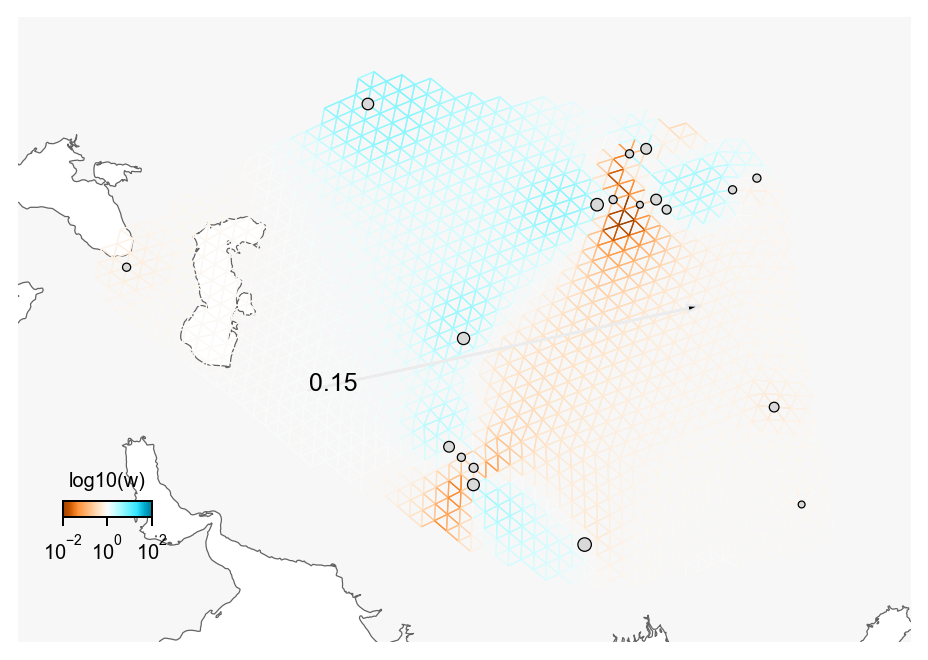

In [160]:
fig = plt.figure(dpi=180)
ax = fig.add_subplot(1, 1, 1, projection=projection)  
v = Viz(ax, warblr_graph, projection=projection, edge_width=.5, 
        edge_alpha=1, edge_zorder=100, sample_pt_size=20, 
        obs_node_size=7.5, sample_pt_color="black", cbar_ticklabelsize=8,
        cbar_font_size=8, cbar_width='10%',cbar_height='2.5%')
v.draw_map(); v.draw_edges(use_weights=True); v.draw_obs_nodes(use_ids=False); v.draw_edge_colorbar()
for ie, e in enumerate([(255, 1060), (484, 1195), (1224, 1146), (12, 1092)]):
        v.draw_arrow([e],warblr_graph.c[ie],lw=1,hw=.5e5,hl=1e5)
v.draw_c_colorbar()

Text(0, 0.5, 'Observed genetic distance')

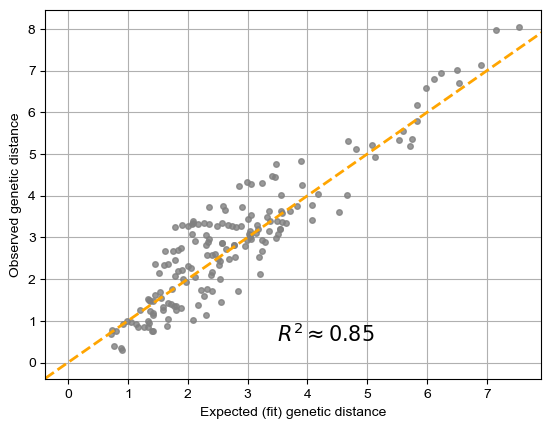

In [178]:
# lamb_grid = np.geomspace(1e-2, 1e2, 10)[::-1]
# cv10_err = run_cv_joint(warblr_graph, lamb_grid=lamb_grid, lamb_q_grid=lamb_grid, n_folds=10)
# plt.plot(lamb_grid,np.nanmean(cv10_err,axis=(0,1)),'k-o',label=r'$\lambda_w$'); plt.xlabel('values'); plt.ylabel('10-fold CV error'); plt.plot(lamb_grid,np.nanmean(cv10_err,axis=(0,2)),'-o',color='grey',label=r'$\lambda_q$'); plt.semilogx(); plt.legend(); 

# warblr_graph.fit(lamb=0.1,optimize_q='n-dim',lamb_q=1.,alpha_q=1/np.mean(warblr_graph.s2))
# obj = Joint_Objective(warblr_graphc); obj.inv(); obj.grad(reg=False)
# tril_idx = np.tril_indices(warblr_graphc.n_observed_nodes, k=-1)
# fit_cov, _, emp_cov = comp_mats(obj)
# fit_dist = cov_to_dist(fit_cov)[tril_idx]
# emp_dist = cov_to_dist(emp_cov)[tril_idx]

X = sm.add_constant(fit_dist)
mod = sm.OLS(emp_dist, X)
res = mod.fit()
muhat, betahat = res.params
plt.plot(fit_dist, emp_dist, 'o', color='grey', alpha=0.8, markersize=4); plt.xlabel('Expected (fit) genetic distance'); 
# plt.plot(fit_dist, betahat*fit_dist+muhat, color='orange', ls='--', lw=1) 
plt.axline((0,0),slope=1,color='orange',ls='--',lw=2); plt.grid()
plt.text(3.5, 0.5, r'$R^2 \approx {:.2f}$'.format(res.rsquared_adj), fontsize=15); plt.ylabel('Observed genetic distance')